In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
ds=pd.read_csv('cardekho.csv')
ds

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
ds.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
ds.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
ds.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
ds.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [8]:
ds['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
ds['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
ds['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [11]:
print(ds.Fuel_Type.value_counts())
print(ds.Seller_Type.value_counts())
print(ds.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


<AxesSubplot: xlabel='count', ylabel='Fuel_Type'>

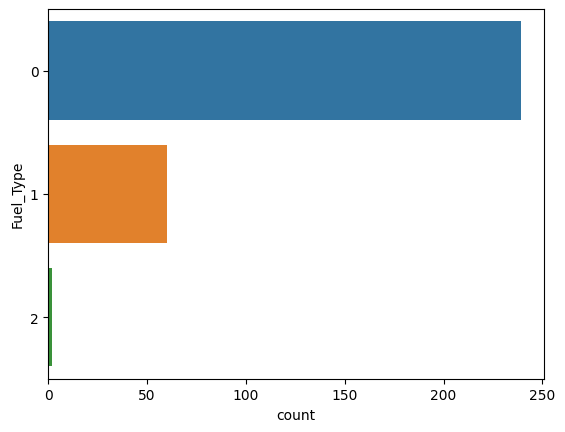

In [49]:
# fig = plt.figure(figsize=[10,4])
# plt.bar('Fuel_Type', data=ds, width = 0.3, height=1)
# plt.show()
sns.countplot(y=ds['Fuel_Type'])

<AxesSubplot: xlabel='count', ylabel='Seller_Type'>

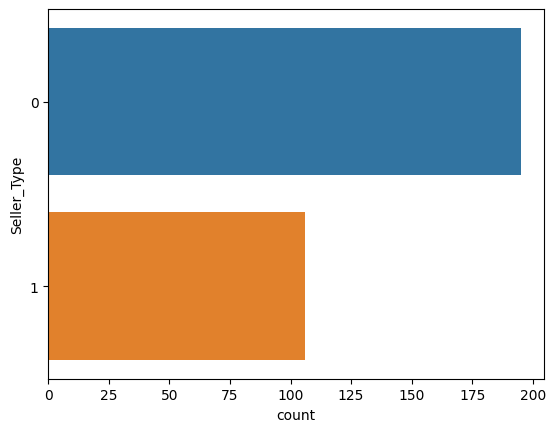

In [50]:
sns.countplot(y=ds['Seller_Type'])

<AxesSubplot: xlabel='count', ylabel='Transmission'>

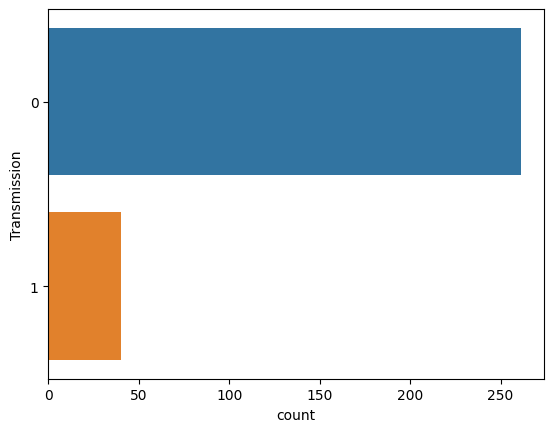

In [51]:
sns.countplot(y=ds['Transmission'])

<AxesSubplot: xlabel='count', ylabel='Owner'>

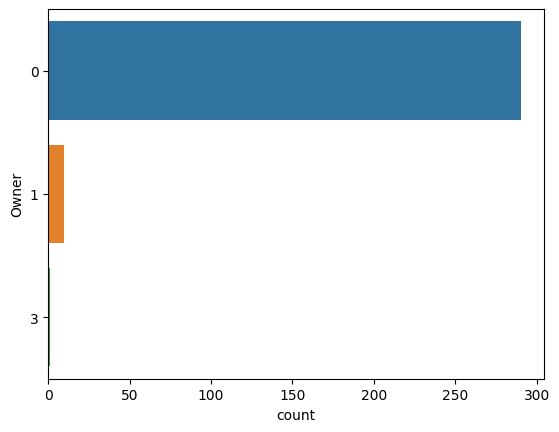

In [52]:
sns.countplot(y=ds['Owner'])

In [16]:
ds.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
ds.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
ds.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [17]:
ds.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
# X = ds.drop(['Car_Name','Selling_Price'],axis=1)
# Y = ds['Selling_Price']
X=ds.drop(['Car_Name','Selling_Price','Seller_Type','Transmission'],axis=1)
Y=ds.Selling_Price
# Z=ds.Insurance
A=ds.Transmission

In [19]:
print(X)


     Year  Present_Price  Kms_Driven  Fuel_Type  Owner
0    2014           5.59       27000          0      0
1    2013           9.54       43000          1      0
2    2017           9.85        6900          0      0
3    2011           4.15        5200          0      0
4    2014           6.87       42450          1      0
..    ...            ...         ...        ...    ...
296  2016          11.60       33988          1      0
297  2015           5.90       60000          0      0
298  2009          11.00       87934          0      0
299  2017          12.50        9000          1      0
300  2016           5.90        5464          0      0

[301 rows x 5 columns]


In [20]:
print(Y)


0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [21]:
A

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Transmission, Length: 301, dtype: int64

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=2)


In [23]:
lin_reg_model = LinearRegression()


In [24]:
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

In [25]:
training_data_prediction = lin_reg_model.predict(X_train)


In [26]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.8659417331090667


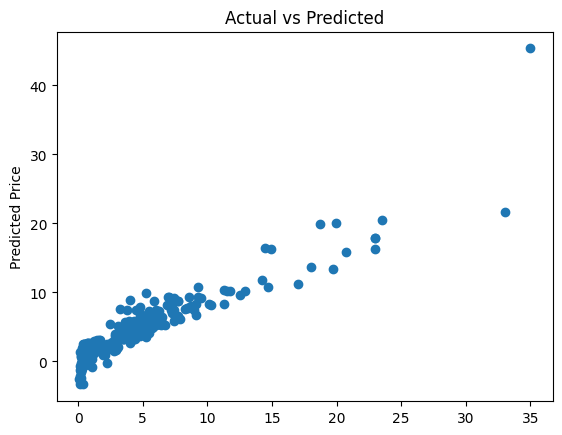

In [27]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel=('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

In [28]:
training_data_prediction=lin_reg_model.predict(X_test)
error_score=metrics.r2_score(Y_test,training_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.8446113951796967


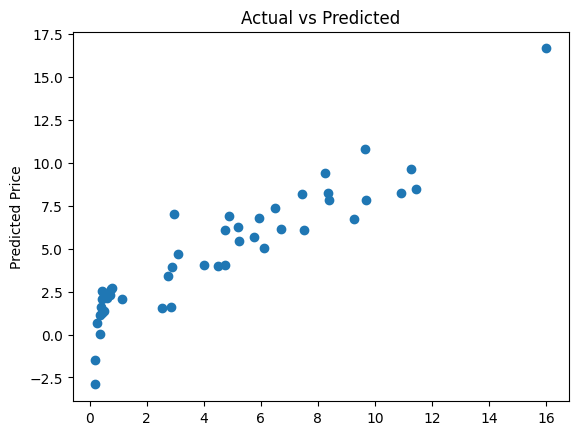

In [29]:
plt.scatter(Y_test,training_data_prediction)
plt.xlabel=('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

In [30]:
training_data_prediction=lin_reg_model.predict(X_test)
error_score=metrics.r2_score(Y_test,training_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.8446113951796967


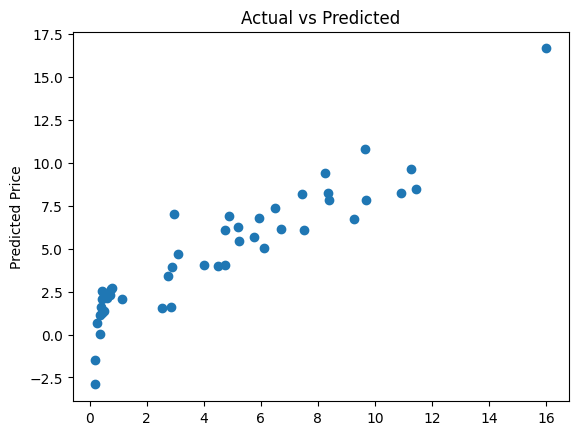

In [31]:
plt.scatter(Y_test,training_data_prediction)
plt.xlabel=('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
import math 
import sklearn.metrics

In [33]:
mse = mean_squared_error(Y_test,training_data_prediction)

In [34]:
rmse = math.sqrt(mse)

In [35]:
rmse

1.5312542230005102

In [36]:
las_reg_model=Lasso()
las_reg_model.fit(X_train,Y_train)

Lasso()

In [37]:
training_data_prediction=las_reg_model.predict(X_train)
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.8400293350672257


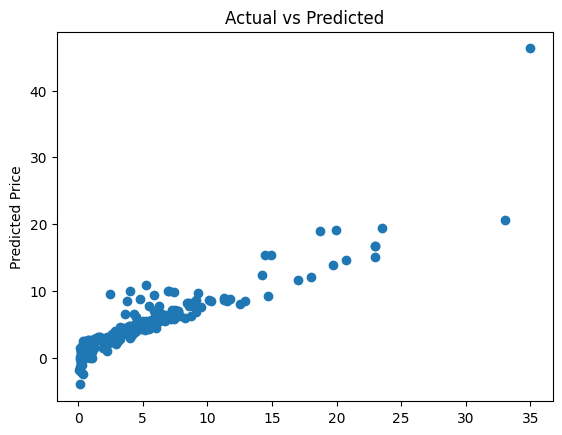

In [38]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel=('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

In [39]:
training_data_prediction=las_reg_model.predict(X_test)
error_score=metrics.r2_score(Y_test,training_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.8940142482159141


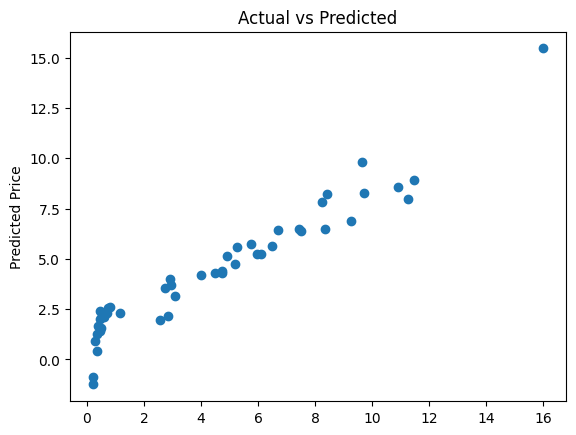

In [40]:
plt.scatter(Y_test,training_data_prediction)
plt.xlabel=('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

In [41]:
mse1 = mean_squared_error(Y_test,training_data_prediction)

In [42]:
mse1

1.5992741453031356

In [43]:
rmse1 = math.sqrt(mse1)

In [44]:
rmse1

1.264624112257526

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
Random_forest_regressor = RandomForestRegressor(random_state = 10)
Random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=10)

In [47]:
print("Training score")
print(Random_forest_regressor.score(X_train, Y_train))

Training score
0.9865669852925699


In [48]:
print("Testing score")
print(Random_forest_regressor.score(X_test, Y_test))

Testing score
0.9761568185111809
